## Deep Neural Network




Let's consider a 3-layer deep neural network with following specifications:

| No. of Layers            | $L=3$      | 
|--------------------------|-----------|
| No. of input features    | $n^{[0]}$ |
| No. of Units in Layer 1  | $n^{[1]}$ |  
| No. of Units in Layer 2  | $n^{[2]}$ |  
| No. of Units in Layer 3  | $n^{[3]}$ |  

The architecture will look like the one shown below:

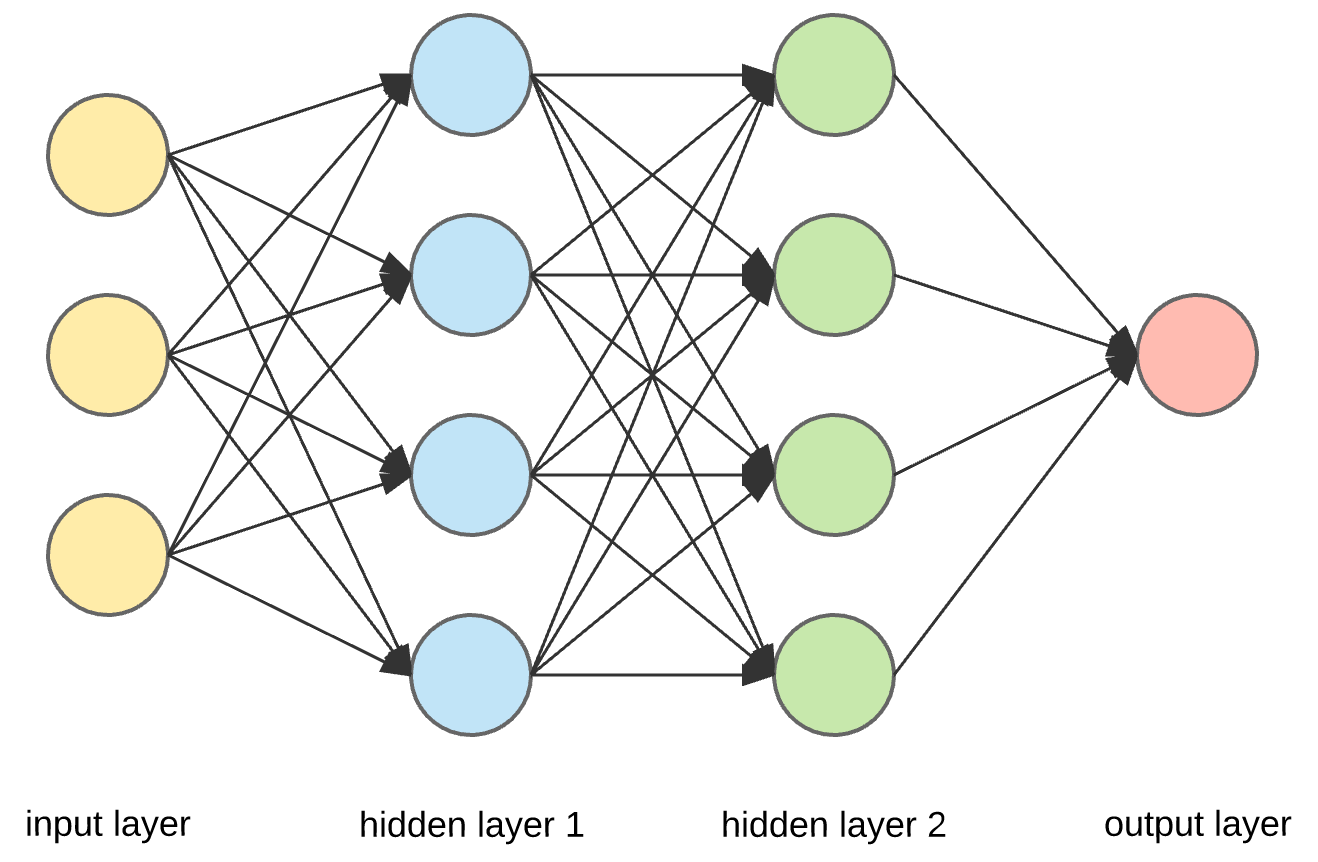

To continue with the derivation, let's consider an input '$X\in \mathbb{R}^{n^{[0]}\times m}$' and outputs $Y\in\mathbb{R}^{1\times m}$. 

| Variable            |        Explanation       | 
|---------------------|--------------------------|
|        $n^{[0]}$    |      No. of features     |
|      $m$            | No. of training examples |  



## Step 1: Initialize Weights

Let's initialize weights with dimension $W\in \mathbb{R}^{n^{[l]}\times n^{[l-1]}}$ and $b\in \mathbb{R}^{n^{[l]}\times 1}$; where $l$ represent the current layer. Therefore, the dimensions would be

| Weight Matrix  | Dimension              | 
|----------------|------------------------|
| $W^{[1]}$ :    | $n^{[1]}\times n^{[0]}$| 
| $W^{[2]}$  :   | $n^{[2]}\times n^{[1]}$|    
| $W^{[3]}$  :   | $n^{[3]}\times n^{[2]}$|  
| $b^{[1]}$  :   | $n^{[1]}\times 1$      |  
| $b^{[2]}$  :   | $n^{[2]}\times 1$      |  
| $b^{[3]}$  :   | $n^{[3]}\times 1$      | 



## Step 2: Forward Propagation

### For layer 1; that is, $A^{[1]}$
\begin{equation}
Z_{n^{[1]}\times m}^{[1]} = W^{[1]}_{n^{[1]}\times n^{[0]} }A^{[0]}_{n^{[0]}\times m}+b_{n^{[1]}\times 1}^{[1]} \\
A_{n^{[1]}\times m }^{[1]} = g\{A_{n^{[1]}\times m}^{[1]}\} 
\end{equation}
where $A^{[0]}=X$ and $g\{.\}$ is an activation function.


### For layer 2; that is, $A^{[2]}$
\begin{equation}
Z_{n^{[2]}\times m}^{[2]} = W_{n^{[2]}\times n^{[1]} }^{[2]}A_{n^{[1]}\times m}^{[1]}+b_{n^{[2]}\times 1 }^{[2]} \\
A_{n^{[2]}\times m}^{[2]} = g\{Z_{n^{[2]}\times m}^{[2]}\}
\end{equation}

### For layer 3; that is, $A^{[3]}$
\begin{equation}
Z_{n^{[3]}\times m}^{[3]} = W_{n^{[3]}\times n^{[2]} }^{[3]}A_{n^{[2]}\times m }^{[2]}+b_{n^{[3]}\times m}^{[3]}\\
A_{n^{[3]}\times m}^{[3]} = g\{Z_{n^{[3]}\times m}^{[3]}\}
\end{equation}



## Step 3: Cost computation
The cost is computed using the following formula
\begin{equation}
\mathcal{J}(W,b) = -\frac{1}{m}\sum\{Y_{n^{[L]}\times m} * \log(A_{n^{[L]}\times m}^{[L]})+
(1-Y_{n^{[L]}\times m}) * \log(1-A_{n^{[L]}\times m}^{[L]})\}
\end{equation}

where $*$ represent point-wise multiplication, and the summation is along rows.

For the given example, the cost function will reduces to
\begin{equation}
\mathcal{J}(W,b) = -\frac{1}{m}\sum\{Y_{n^{[3]}\times m} * \log(A_{n^{[3]}\times m}^{[3]})+
(1-Y_{n^{[3]}\times m}) * \log(1-A_{n^{[3]}\times m}^{[3]})\}
\end{equation}


## Step 4: Backpropagation

Now, we will calculate the following

| Weight Matrix           | Dimension        |
|-------------------------|------------------|
| $dW^{[3]}$ :    | $n^{[3]}\times n^{[2]}$  | 
| $db^{[3]}$ :    | $n^{[3]}\times 1$        |
| $dW^{[2]}$  :   | $n^{[2]}\times n^{[1]}$  |   
| $db^{[2]}$ :    | $n^{[2]}\times 1$        |
| $dW^{[1]}$  :   | $n^{[1]}\times n^{[0]}$  |   
| $db^{[1]}$ :    | $n^{[1]}\times 1$        |

### Computing $dW^{[3]}$ and $db^{[3]}$


The cost function varies with respect to $A^{[3]}$; therefore, we will compute its derivative w.r.t. $A^{[3]}$
\begin{equation}
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} = 
dA^{[3]}=
-\frac{1}{m}\{\frac{Y}{A^{[3]}}+\frac{1-Y}{1-A^{[3]}} \} =
-\frac{1}{m}\{\frac{Y-A^{[3]}}{A^{[3]}(1-A^{[3]})} \}
\end{equation}

Let's consider that the activation function in $A^{[3]} = g\{Z^{[3]}\}$ is the sigmoid function; that is,
$$A^{[3]} = \frac{1}{1+e^{-Z^{[3]}}}$$
Let's take the derivative of $A^{[3]}$ w.r.t. $Z^{[3]}$, we get
\begin{equation}
\frac{\partial A^{[3]}}{\partial Z^{[3]}} = A^{[3]}(1-A^{[3]})
\end{equation}

Let's take the derivative of $\mathcal{J}(W,b)$ w.r.t. $Z^{[3]}$, we get
\begin{equation}
\frac{\partial \mathcal{J}(W,b)}{\partial Z^{[3]}} = 
dZ^{[3]}=
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} \frac{\partial A^{[3]}}{\partial Z^{[3]}} =
\frac{1}{m}(A^{[3]}-Y)
\end{equation}

Let's take the derivative of $Z^{[3]} = W^{[3]}A^{[2]}+b^{[3]}$ w.r.t $W^{[3]}$ and $b^{[3]}$, we get
\begin{equation}
\frac{\partial Z^{[3]}}{\partial W^{[3]}} = A^{[2]} \\
\frac{\partial Z^{[3]}}{\partial b^{[3]}} = 1
\end{equation}


---

Now, Let's compute the derivative of $\mathcal{J}(W,b)$ w.r.t $W^{[3]}$ and $b^{[3]}$, we will employ chain rule as follows:

\begin{equation}
\begin{aligned}
\frac{\partial \mathcal{J}(W,b)}{\partial W^{[3]}} &=\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}}
\frac{\partial A^{[3]}}{\partial Z^{[3]}}
\frac{\partial Z^{[3]}}{\partial b^{[3]}}\\
&=dZ^{[3]}\frac{\partial Z^{[3]}}{\partial b^{[3]}}\\
dW^{[3]}&= \frac{1}{m} (Y-A^{[3]}) A^{[2]T}
\end{aligned}
\end{equation}

Similarly for $b^{[3]}$

\begin{equation}
\begin{aligned}
\frac{\partial \mathcal{J}(W,b)}{\partial b^{[3]}} &=\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}}
\frac{\partial A^{[3]}}{\partial Z^{[3]}}
\frac{\partial Z^{[3]}}{\partial W^{[3]}}\\
&=dZ^{[3]}\frac{\partial Z^{[3]}}{\partial W^{[3]}}\\
dW^{[3]}&= \frac{1}{m} (Y-A^{[3]}) \text{sum along rows}
\end{aligned}
\end{equation}

---

### Computing $dW^{[2]}$ and $db^{[2]}$


Now, the task is to find the how $\mathcal{J}(W,b)$ varies with respect to $W^{[2]}$ and $b^{[2]}$

---

Let's take the derivative of $Z^{[3]} = W^{[3]}A^{[2]}+b{[3]}$ with respect to $A^{[2]}$

\begin{equation}
\frac{\partial Z^{[3]}}{\partial A^{[2]}} =\frac{1}{\partial A^{[2]}} (W^{[3]}A^{[2]}+b{[3]})= W^{[3]}
\end{equation}

Let's take the derivative of $\mathcal{J}(W,b)$ with respect to $A^{[2]}$


\begin{equation}
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} = 
dA^{[2]}=
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} \frac{\partial A^{[3]}}{\partial Z^{[3]}}\frac{\partial Z^{[3]}}{\partial A^{[2]}} =
dZ^{[3]}\frac{\partial Z^{[3]}}{\partial A^{[2]}}=
dZ^{[3]}W^{[3]}=W^{[3]T}dZ^{[3]}
\end{equation}

---



Let's take the derivative of $A^{[2]} = g\{Z^{[2]}\}$ with respect to $Z^{[2]}$

\begin{equation}
\frac{\partial A^{[2]}}{\partial Z^{[2]}} = g\prime \{Z^{[2]}\}
\end{equation}

Let's take the derivative of $\mathcal{J}(W,b)$ with respect to $Z^{[2]}$


\begin{equation}
\frac{\partial \mathcal{J}(W,b)}{\partial Z^{[3]}} = 
dZ^{[2]}=
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} \frac{\partial A^{[3]}}{\partial Z^{[3]}}\frac{\partial Z^{[3]}}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}}=
dA^{[2]}\frac{\partial A^{[2]}}{\partial Z^{[2]}}=
W^{[3]T}dZ^{[3]}*g'(Z^{[3]}) \ \  \ \text{where * indicates point-wise multiplication and ' repesent derivative}
\end{equation}


---

Let's take the derivative of $Z^{[2]} = W^{[2]}A^{[1]}+b^{[2]}$ w.r.t $W^{[2]}$ and $b^{[2]}$, we get
\begin{equation}
\frac{\partial Z^{[2]}}{\partial W^{[2]}} = A^{[1]} \\
\frac{\partial Z^{[2]}}{\partial b^{[2]}} = 1
\end{equation}

Now, Let's compute the derivative of $\mathcal{J}(W,b)$ w.r.t $W^{[2]}$ and $b^{[2]}$, we will employ chain rule as follows:

\begin{equation}
\begin{aligned}
\frac{\partial \mathcal{J}(W,b)}{\partial W^{[2]}} &= dW^{[2]} \\&= 
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} \frac{\partial A^{[3]}}{\partial Z^{[3]}}\frac{\partial Z^{[3]}}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}}
\frac{\partial Z^{[2]}}{\partial W^{[2]}}\\
&=dZ^{[2]}\frac{\partial Z^{[2]}}{\partial W^{[2]}} \\
&= dZ^{[2]} A^{[2]T}
\end{aligned}
\end{equation}

Similarly for $b^{[3]}$

\begin{equation}
\begin{aligned}
\frac{\partial \mathcal{J}(W,b)}{\partial b^{[2]}} &= db^{[2]} \\&= 
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} \frac{\partial A^{[3]}}{\partial Z^{[3]}}\frac{\partial Z^{[3]}}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}}
\frac{\partial Z^{[2]}}{\partial b^{[2]}}\\
&=dZ^{[2]}\frac{\partial Z^{[2]}}{\partial b^{[2]}} \\
&= dZ^{[2]} \hspace{2cm} \text{sum along rows}\\
\end{aligned}
\end{equation}

---

### Computing $dW^{[1]}$ and $db^{[1]}$


Now, the task is to find the how $\mathcal{J}(W,b)$ varies with respect to $W^{[1]}$ and $b^{[1]}$

---

Let's take the derivative of $Z^{[2]} = W^{[2]}A^{[1]}+b{[2]}$ with respect to $A^{[1]}$

\begin{equation}
\frac{\partial Z^{[2]}}{\partial A^{[1]}} =\frac{1}{\partial A^{[1]}} (W^{[2]}A^{[1]}+b{[2]})= W^{[2]}
\end{equation}

Let's take the derivative of $\mathcal{J}(W,b)$ with respect to $A^{[1]}$


\begin{equation}
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[1]}} = 
dA^{[1]}=
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} 
\frac{\partial A^{[3]}}{\partial Z^{[3]}}
\frac{\partial Z^{[3]}}{\partial A^{[2]}} 
\frac{\partial A^{[2]}}{\partial Z^{[2]}}
\frac{\partial Z^{[2]}}{\partial A^{[1]}}=
dZ^{[2]}\frac{\partial Z^{[2]}}{\partial A^{[1]}}=
dZ^{[2]}W^{[2]}=W^{[2]T}dZ^{[2]}
\end{equation}

---



Let's take the derivative of $A^{[1]} = g\{Z^{[1]}\}$ with respect to $Z^{[1]}$

\begin{equation}
\frac{\partial A^{[1]}}{\partial Z^{[1]}} = g\prime \{Z^{[1]}\}
\end{equation}

Let's take the derivative of $\mathcal{J}(W,b)$ with respect to $Z^{[1]}$


\begin{equation}
\frac{\partial \mathcal{J}(W,b)}{\partial Z^{[1]}} = 
dZ^{[1]}=
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} 
\frac{\partial A^{[3]}}{\partial Z^{[3]}}
\frac{\partial Z^{[3]}}{\partial A^{[2]}} 
\frac{\partial A^{[2]}}{\partial Z^{[2]}}
\frac{\partial Z^{[2]}}{\partial A^{[1]}}
\frac{\partial A^{[1]}}{\partial Z^{[1]}}=
dA^{[1]}\frac{\partial A^{[1]}}{\partial Z^{[1]}}=
W^{[2]T}dZ^{[2]}*g'(Z^{[2]}) \ \  \ \text{where * indicates point-wise multiplication and ' repesent derivative}
\end{equation}


---

Let's take the derivative of $Z^{[1]} = W^{[1]}A^{[0]}+b^{[1]}$ w.r.t $W^{[1]}$ and $b^{[1]}$, we get
\begin{equation}
\frac{\partial Z^{[1]}}{\partial W^{[1]}} = A^{[0]} \\
\frac{\partial Z^{[1]}}{\partial b^{[1]}} = 1
\end{equation}

Now, Let's compute the derivative of $\mathcal{J}(W,b)$ w.r.t $W^{[1]}$ and $b^{[1]}$, we will employ chain rule as follows:

\begin{equation}
\begin{aligned}
\frac{\partial \mathcal{J}(W,b)}{\partial W^{[1]}} &= dW^{[1]} \\&= 
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} 
\frac{\partial A^{[3]}}{\partial Z^{[3]}}
\frac{\partial Z^{[3]}}{\partial A^{[2]}} 
\frac{\partial A^{[2]}}{\partial Z^{[2]}}
\frac{\partial Z^{[2]}}{\partial A^{[1]}}
\frac{\partial A^{[1]}}{\partial Z^{[1]}}
\frac{\partial Z^{[1]}}{\partial W^{[1]}}\\
&=dZ^{[1]}\frac{\partial Z^{[1]}}{\partial W^{[1]}} \\
&= dZ^{[1]} A^{[0]T}
\end{aligned}
\end{equation}

Similarly for $b^{[1]}$

\begin{equation}
\begin{aligned}
\frac{\partial \mathcal{J}(W,b)}{\partial W^{[1]}} &= db^{[1]} \\&= 
\frac{\partial \mathcal{J}(W,b)}{\partial A^{[3]}} 
\frac{\partial A^{[3]}}{\partial Z^{[3]}}
\frac{\partial Z^{[3]}}{\partial A^{[2]}} 
\frac{\partial A^{[2]}}{\partial Z^{[2]}}
\frac{\partial Z^{[2]}}{\partial A^{[1]}}
\frac{\partial A^{[1]}}{\partial Z^{[1]}}
\frac{\partial Z^{[1]}}{\partial b^{[1]}}\\
&=dZ^{[1]}\frac{\partial Z^{[1]}}{\partial b^{[1]}} \\
&= dZ^{[1]} \hspace{2cm} \text{sum along rows}\\
\end{aligned}
\end{equation}

---

# The Formulas for Back Propagation

\begin{equation}
\begin{aligned}
dZ^{[L]} &= Y - A^{[L]} \\
dW^{[L]} &= \frac{1}{m}dZ^{[L]}A^{[L-1]T}\\
db^{[L]} &= \frac{1}{m}np.sum(dZ^{[L]}, axis=1, keepdims=True)\\
\newline
dZ^{[L-1]} &= W^{[L]T}dZ^{[L]} * g^{[L-1]'}(Z^{[L-1]})\\
dW^{[L-1]} &= \frac{1}{m}dZ^{[L-1]}A^{[L-2]T}\\
db^{[L-1]} &= \frac{1}{m}np.sum(dZ^{[L-1]}, axis=1, keepdims=True)\\
\vdots
\newline
\newline
dZ^{[2]} &= W^{[3]T}dZ^{[3]} * g^{[2]'}(Z^{[2]})\\
dW^{[2]} &= \frac{1}{m}dZ^{[2]}A^{[1]T}\\
db^{[2]} &= \frac{1}{m}np.sum(dZ^{[2]}, axis=1, keepdims=True)\\
\newline
\newline
dZ^{[1]} &= W^{[2]T}dZ^{[2]} * g^{[1]'}(Z^{[1]})\\
dW^{[1]} &= \frac{1}{m}dZ^{[1]}A^{[0]T}\\
db^{[1]} &= \frac{1}{m}np.sum(dZ^{[1]}, axis=1, keepdims=True)\\
\end{aligned}
\end{equation}

In above formulas, $*$ denote point-wise multiplication, and $A^{[0]}=X$.

## Let's Analyze above formulas in terms of dimensions

\begin{equation}
\begin{aligned}
dZ^{[L]}  \rightarrow \mathbb{R}^{[n^L,m]} &=\mathbb{R}^{[n^L,m]} - \mathbb{R}^{[n^L,m]} \\
dW^{[L]} \rightarrow \mathbb{R}^{[n^L,n^{L-1}]}  &=  \mathbb{R}^{[n^L,m]}  \mathbb{R}^{[m, n^{L-1}]} \\
db^{[L]} \rightarrow \mathbb{R}^{[n^L,1]} &= \frac{1}{m}np.sum(\mathbb{R}^{[n^L,m]}, axis=1, keepdims=True)\\
\newline
dZ^{[L-1]} \rightarrow \mathbb{R}^{[n^{L-1},m]} &= \mathbb{R}^{[n^{L-1},n^L]}\mathbb{R}^{[n^L,m]} * \mathbb{R}^{[n^{L-1},m]}\\
dW^{[L-1]} \rightarrow \mathbb{R}^{[n^{L-1},n^{L-2}]} &= \frac{1}{m}\mathbb{R}^{[n^{L-1},m]}\mathbb{R}^{[m,n^{L-2}]}\\
db^{[L-1]} \rightarrow \mathbb{R}^{[n^{L-1},1]} &= \frac{1}{m}np.sum(\mathbb{R}^{[n^{L-1},m]}, axis=1, keepdims=True)\\
\vdots
\newline
\newline
dZ^{[2]} \rightarrow \mathbb{R}^{[n^{2},m]} &= \mathbb{R}^{[n^{2},n^3]}\mathbb{R}^{[n^3,m]} * \mathbb{R}^{[n^{2},m]}\\
dW^{[2]} \rightarrow \mathbb{R}^{[n^{2},n^{1}]} &= \frac{1}{m}\mathbb{R}^{[n^{2},m]}\mathbb{R}^{[m,n^{1}]}\\
db^{[2]} \rightarrow \mathbb{R}^{[n^{2},1]} &= \frac{1}{m}np.sum(\mathbb{R}^{[n^{2},m]}, axis=1, keepdims=True)\\
\newline
\newline
dZ^{[1]} \rightarrow \mathbb{R}^{[n^{1},m]} &= \mathbb{R}^{[n^{1},n^2]}\mathbb{R}^{[n^2,m]} * \mathbb{R}^{[n^{1},m]}\\
dW^{[1]} \rightarrow \mathbb{R}^{[n^{1},n^{0}]} &= \frac{1}{m}\mathbb{R}^{[n^{1},m]}\mathbb{R}^{[m,n^{0}]}\\
db^{[1]} \rightarrow \mathbb{R}^{[n^{1},1]} &= \frac{1}{m}np.sum(\mathbb{R}^{[n^{1},m]}, axis=1, keepdims=True)\\
\end{aligned}
\end{equation}

Where

| Weight Matrix     |                     Dimension                            | 
|-------------------|----------------------------------------------------------|
| $W^{[1]}$ :       | $n^{[1]}\times n^{[0]}$                                  | 
| $b^{[1]}$  :      | $n^{[1]}\times 1$                                        | 
| $W^{[2]}$  :      | $n^{[2]}\times n^{[1]}$                                  | 
| $b^{[2]}$  :      | $n^{[2]}\times 1$                                        |   
| $W^{[L-1]}$  :    | $n^{[L-1]}\times n^{[L-2]}$                              |   
| $b^{[L-1]}$  :    | $n^{[L-1]}\times 1$                                      | 
| $W^{[L]}$  :      | $n^{[L]}\times n^{[L-1]}$                                |   
| $b^{[L]}$  :      | $n^{[L]}\times 1$                                        | 

- $n^{0}$ represents the number of features in each training e
xample.
- $n^{1}$ represents the number of neurons in the first layer 1.
- $n^{2}$ represents the number of neurons in the layer 2.
- $n^{L-1}$ represents the number of neurons in the layer L-1.
- $n^{L}$ represents the number of neurons in the output layer L.
- $m$ represents the number of training example.